In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from Ge_calculation import GAP, MD_run
from Ge_analysis import *
import matplotlib.pyplot as plt
import pickle
from ase.io.cfg import read_cfg
import numpy as np
import os
from ase import build
from ase.atoms import Atoms
from quippy.potential import Potential
from quippy.descriptors import Descriptor
from ase.io.proteindatabank import read_proteindatabank, write_proteindatabank
from ase.io.lammpsdata import write_lammps_data
from scipy.optimize import curve_fit
from ase.io import Trajectory
from ase.io import read
from ase.eos import EquationOfState
from ase.visualize import view
from copy import deepcopy
from ase.io.castep import read_castep_castep, read_param
from ase.io import read
from ase.io.extxyz import read_xyz, write_xyz
import pandas as pd
from ase.lattice import hexagonal, tetragonal, orthorhombic
from ase.constraints import StrainFilter, UnitCellFilter, ExpCellFilter, FixAtoms
from ase.optimize import BFGS
import pymatgen.ext.matproj as mp
import pymatgen.core.periodic_table as pt
import pymatgen.io.ase as pase
import cProfile
import re
from sklearn import decomposition
from pyuoi.decomposition import CUR
import matplotlib.pyplot as plt

/home/joe/miniconda3/envs/Q/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.linear_model.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/joe/miniconda3/envs/Q/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.linear_model.coordinate_descent module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/joe/miniconda3/envs/Q/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.lin

In [3]:
import matplotlib as mpl
mpl.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern"]})
mpl.rcParams['text.latex.preamble'] = [
    r'\usepackage{siunitx}']

<ipython-input-3-f3bf99f4e872>:6: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  mpl.rcParams['text.latex.preamble'] = [


In [5]:
GE = '/Users/Moji/Documents/Summer20/Ge/'
os.chdir('/Users/Moji/Documents/Summer20/Ge/')
pot_dir ='/Users/Moji/Documents/Summer20/Ge/Potentials/rescaling/'

In [6]:
os.listdir(GE+'Potentials/rescaling/')

['slurm-2399491.out',
 'old_resc_orig_as5_ds002_vT.xml.sparseX.GAP_2020_9_4_60_19_34_37_4591',
 'resc_orig_train.xyz.idx',
 'resc_orig_as5_ds002_vT.xml.sparseX.GAP_2020_9_7_60_23_49_51_8441',
 'resc_orig_train.xyz',
 'gap2.sh',
 'resc_orig_as5_ds002_vT.xml.sparseX.GAP_2020_9_7_60_23_49_51_8442',
 'resc_amorphs_as5_ds002_vT.xml',
 'slurm-2400180.out',
 'resc_amorphs_train.xyz',
 'old_resc_orig_as5_ds002_vT.xml.sparseX.GAP_2020_9_4_60_19_34_37_4592',
 'old_resc_orig_as5_ds002_vT.xml',
 'resc_orig_as5_ds002_vT.xml.sparseX.GAP_2020_9_4_60_19_34_37_4591',
 'slurm-2400018.out',
 'resc_orig_validate.xyz',
 'resc_amorphs_as5_ds002_vT.xml.sparseX.GAP_2020_9_4_60_17_10_39_6182',
 'resc_amorphs_as5_ds002_vT.xml.sparseX.GAP_2020_9_4_60_17_10_39_6181',
 'gap.sh',
 'resc_orig_as5_ds002_vT.xml',
 'resc_amorphs_validate.xyz',
 'slurm-2399490.out',
 'resc_orig_as5_ds002_vT.xml.sparseX.GAP_2020_9_4_60_19_34_37_4592',
 'resc_amorphs_train.xyz.idx']

In [7]:
hp64_GAP = GAP(train_file=GE+'Potentials/hp_liquid/hpliq_64/hpliq_64_train.xyz',
               val_file=GE+'Potentials/hp_liquid/hpliq_64/hpliq_64_validate.xyz',
               pot=GE+'Potentials/hp_liquid/hpliq_64/hpliq_64_as5_ds002_vT.xml',
               sorted_order=[0, 3, 4, 1, 2])
hp64_GAP.load(GE+'Pickles/hp64_GAP')

/home/joe/ase/ase/calculators/calculator.py:545: FutureWarning: The keyword "ignore_bad_restart_file" is deprecated and will be removed in a future version of ASE.  Passing more than one positional argument to Calculator is also deprecated and will stop functioning in the future.  Please pass arguments by keyword (key=value) except optionally the "restart" keyword.
  warnings.warn(FutureWarning(


Training set structure count: 231
Validation set structure count: 50
Reading xyz file (may take a while)
Read configs, now fixing virials
Config labels: ['amorph', 'liq', 'hiT_liq', 'hiT_amorph', 'inter']
New order:  ['amorph', 'hiT_amorph', 'inter', 'liq', 'hiT_liq']
Load successful
data_dict:  dict_keys(['sorted_order', 'QM_E_t', 'QM_F_t', 'QM_V_t', 'QM_E_v', 'QM_F_v', 'QM_V_v', 'T_configs', 'V_configs', 'GAP_E_t', 'GAP_F_t', 'GAP_V_t', 'E_err_t', 'F_err_t', 'V_err_t', 'E_rmse_t', 'F_rmse_t', 'V_rmse_t', 'GAP_E_v', 'GAP_F_v', 'GAP_V_v', 'E_err_v', 'F_err_v', 'V_err_v', 'E_rmse_v', 'F_rmse_v', 'V_rmse_v'])


In [8]:
Si_hp_MDs = [MD_run(GE+'/MD_runs/Si_hp_liquid/'+i) for i in
sorted([i for i in os.listdir(GE+'/MD_runs/Si_hp_liquid') if 'run' in i],
       key=lambda x: int(x.split('_')[-1]))]

In [9]:
Ge_exp_Sq = np.genfromtxt(GE+'paper_data/Ge_Sq_exp.txt', delimiter=', ').T

In [10]:
Ge_hpliq_64_1000MD = MD_run(GE+'MD_runs/Ge_hp/hpliq_64/run_1000_001')

In [11]:
tmp = Ge_hpliq_64_1000MD.structure_factors(selection=([i for i in range(40,120)]),
                              rings_dir=GE+'MD_runs/Ge_hp/hpliq_64/rings',
                              read_only=True)

Ge_hpliq_64_1000MD.bin_fit(q_selection=[1,12], nbins=200)

FileNotFoundError: [Errno 2] No such file or directory: '40/sq/sq-xrays.dat'

In [12]:
descriptor = Descriptor(
                        'soap average=T l_max=6 n_max=12 atom_sigma=0.5 \
                              cutoff=5.0 cutoff_transition_width=1.0 \
                              central_weight=1.0')
descs = [np.array([descriptor.calc_descriptor(i) for i in j.df['Configs']])
         for j in Si_hp_MDs]
zeta = 4
a = flatten(descs)
k_mat = np.array([[2 - 2*np.dot(i[0]**zeta, j[0]**zeta) for j in a] for i in a])
pca = decomposition.PCA(n_components=2)
pca.fit(k_mat)
red = pca.fit_transform(k_mat)


In [11]:
p = pd.concat([i.df['f_PressAve'] for i in Si_hp_MDs])
c = pd.concat([i.df['f_TempAve'] for i in Si_hp_MDs])

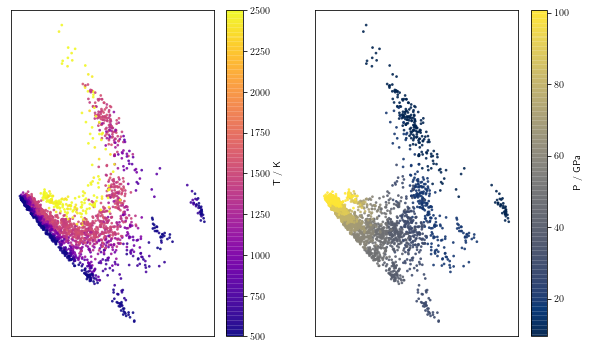

In [16]:
fig, axs = plt.subplots(1,2, figsize=(10,6))
cmap = plt.cm.plasma
norm = mpl.colors.Normalize(vmin=500, vmax=2500)
im1 = axs[0].scatter(red.T[0], red.T[1], c=c, cmap='plasma', norm=norm, alpha=0.8, s=3)
cbar = fig.colorbar(im1, ax=axs[0])
cbar.set_label('T / K')
im2 = axs[1].scatter(red.T[0], red.T[1], c=p*1e-4, cmap='cividis', alpha=0.8, s=3)
cbar2 = fig.colorbar(im2, ax=axs[1])
cbar2.set_label('P / GPa')
axs[0].get_xaxis().set_visible(False)
axs[0].get_yaxis().set_visible(False)
axs[1].get_xaxis().set_visible(False)
axs[1].get_yaxis().set_visible(False)
fig.savefig(GE+'Analysis/Si_hp_MDs_simmap.png', bbox_inches='tight', dpi=100)

In [19]:
for i, val in enumerate(Si_hp_MDs):
    tmp = val.structure_factors([j for j in range(40,120)],
                                  rings_dir=GE+'MD_runs/Si_hp_liquid/rings_'+str(i),
                                  read_only=True)
    val.bin_fit_g()

R.I.N.G.S ran successfully
R.I.N.G.S ran successfully
R.I.N.G.S ran successfully
R.I.N.G.S ran successfully
R.I.N.G.S ran successfully
R.I.N.G.S ran successfully
R.I.N.G.S ran successfully
R.I.N.G.S ran successfully
R.I.N.G.S ran successfully
R.I.N.G.S ran successfully


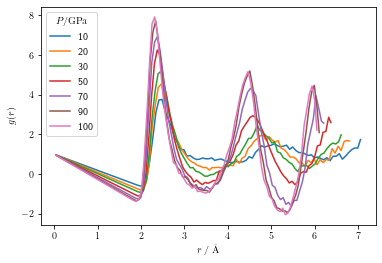

In [30]:
fig, axs = plt.subplots()
for ct,i in enumerate(Si_hp_MDs):
    if ct not in [3, 5, 7]:
        #axs.errorbar(*i.gr_av, yerr=i.gr_std[1],
        axs.errorbar(*i.gr_av, yerr=None,
                    label='{}'.format(int(i.run_dir.split('/')[-1].split('_')[-1])*10))

axs.legend(title=r"$P / \si{GPa}$")
axs.set(xlabel=r'$r \;/\; \si{\angstrom}$', ylabel=r'$g(r)$')
fig.savefig(GE+'Analysis/Si_hp_MDs_gr.png', bbox_inches='tight', dpi=100)


In [94]:
Si_exp_lADF = np.genfromtxt('/Users/Moji/Documents/paper_data/l-Si_ADF_Bartok2018_DFT.txt',
                          delimiter=', ').T
Si_exp_lADF_GAP = np.genfromtxt('/Users/Moji/Documents/paper_data/l-Si_ADF_Bartok2018_GAP.txt',
                          delimiter=', ').T
Si_exp_Sq = np.genfromtxt('/Users/Moji/Documents/paper_data/Si_Sq_exp_Waseda1974.txt',
                          delimiter=', ').T
Si_exp_Sq[1] -= 0.5
#Si_exp_gr = np.genfromtxt('/Users/Moji/Documents/paper_data/')

In [199]:

Si_exp_RDF = np.genfromtxt('/Users/Moji/Documents/paper_data/l-Si_RDF_Bartok2018_DFT.txt',
                          delimiter=', ').T
Si_lGAP_RDF = np.genfromtxt('/Users/Moji/Documents/paper_data/l-Si_RDF_Bartok2018_GAP.txt',
                          delimiter=', ').T

In [35]:
aSi_exp_Sq = np.genfromtxt('/Users/Moji/Documents/paper_data/a-Si_x-ray_Laaziri1999.txt',
                          delimiter=', ').T

In [83]:
Si_litDB_liqamo_64 = MD_run(GE+'MD_runs/Si_litDB_amoliq/run_64001')
Si_litDB_liq_amo_dia_64 =  MD_run(GE+'MD_runs/Si_litDB_amo_liq_dia/run_64001')

In [37]:
Si_litDB_liqamo_MDS = [MD_run(GE+'MD_runs/Si_litDB_amoliq/'+i) for i in os.listdir(GE+'MD_runs/Si_litDB_amoliq/')
if 'run_64_' in i]

In [84]:
Si_litDB_glue = MD_run(GE+'MD_runs/Si_litDB_amoliq/run_64_glue')

In [ ]:
Si_litDB_litcom = MD_run(GE+'MD_runs/Si_litDB_litcommand/run_64_')

In [172]:
Si_litDB_litcom_1000 = MD_run(GE+'MD_runs/Si_litDB_litcommand/run_1000_001')

In [274]:
Si_litpot_MD = MD_run(GE+'MD_runs/Si_testrun/run_64001')

In [40]:
for ct, j in enumerate(Si_litDB_liqamo_MDS):
    print(j.label)
    j.structure_factors(selection=[i for i in range(30,120)]+[i for i in range(220,240)],
                        rings_dir=GE+'MD_runs/Si_litDB_amoliq/Sq_rings_' + str(ct),
                        opts={'Angles':True},
                        read_only=True)
    j.bin_fit(s_selection=[i for i in range(90)], q_selection=[0.5,12])
    j.bin_fit(s_selection=[i for i in range(90, 110)], q_selection=[0.5,12])


Si_litDB_amoliq
Si_litDB_amoliq
Si_litDB_amoliq
Si_litDB_amoliq


IndexError: list index out of range

In [43]:
os.chdir(GE)

In [242]:
tmp = Si_litDB_liqamo_64.structure_factors(selection=[i for i in range(30,120)]+[i for i in range(220,240)],
                                                        rings_dir=GE+'MD_runs/Si_litDB_amoliq/Sq_rings',
                                                        opts={'Angles':True},
                                                        read_only=True)
tmp = Si_litDB_liq_amo_dia_64.structure_factors(selection=[i for i in range(30,120)]+[i for i in range(220,240)],
                                                             rings_dir=GE+'MD_runs/Si_litDB_amo_liq_dia/Sq_rings',
                                                             opts={'Angles':True},
                                                             read_only=True)
tmp = Si_litDB_glue.structure_factors(selection=[i for i in range(30,120)]+[i for i in range(220,240)],
                                                             rings_dir=GE+'MD_runs/Si_litDB_amoliq/Sq_rings_glue',
                                                             opts={'Angles':True},
                                                             read_only=True)
tmp = Si_litDB_litcom.structure_factors(selection=[i for i in range(30,120)]+[i for i in range(220,240)],
                                                             rings_dir=GE+'MD_runs/Si_litDB_litcommand/Sq_rings',
                                                             opts={'Angles':True},
                                                             read_only=True)
tmp = Si_litDB_litcom_1000.structure_factors(selection=[i for i in range(10,20)] + [i for i in range(30,58)],
                                                             rings_dir=GE+'MD_runs/Si_litDB_litcommand/Sq_rings_1000',
                                                             opts={'Angles':True},
                                                             read_only=True)

Si_litDB_liqamo_64.bin_fit(s_selection=[i for i in range(0,90)], q_selection=[0.5,12])
Si_litDB_liq_amo_dia_64.bin_fit(s_selection=[i for i in range(0,90)], q_selection=[0.5,12])
Si_litDB_liqamo_64.bin_fit(s_selection=[i for i in range(90,110)], q_selection=[0.5,12])
Si_litDB_liq_amo_dia_64.bin_fit(s_selection=[i for i in range(90,110)], q_selection=[0.5,12])
Si_litDB_glue.bin_fit(s_selection=[i for i in range(0,90)], q_selection=[0.5,12])
Si_litDB_glue.bin_fit(s_selection=[i for i in range(90,110)], q_selection=[0.5,12])
Si_litDB_litcom.bin_fit(s_selection=[i for i in range(70,90)], q_selection=[0.5,12])
Si_litDB_litcom.bin_fit(s_selection=[i for i in range(90,110)], q_selection=[0.5,12])
Si_litDB_litcom_1000.bin_fit(s_selection=[i for i in range(0,10)], q_selection=[0.5,12])
Si_litDB_litcom_1000.bin_fit(s_selection=[i for i in range(0,28)], q_selection=[0.5,12])

In [276]:
tmp = Si_litpot_MD.structure_factors(selection=[i for i in range(10,20)] +\
                                               [i for i in range(30,120)] + [i for i in range(220,240)],
                                                rings_dir=GE+'MD_runs/Si_testrun/Sq_rings_ADF',
                                                opts={'Angles':True},
                                                rings_in={'Grtot':2.7},
                                                read_only=False)


R.I.N.G.S ran successfully


In [260]:
testd = {3:2}
test2 = {3:4}
for i in testd:
    test2[i] = testd[i]
print(test2)

{3: 2}


In [277]:
Si_litpot_MD.bin_fit(s_selection=[i for i in range(0,10)], q_selection=[0.5,12])
Si_litpot_MD.bin_fit(s_selection=[i for i in range(10,100)], q_selection=[0.5,12])
Si_litpot_MD.bin_fit(s_selection=[i for i in range(100,120)], q_selection=[0.5,12])


In [278]:

Si_litpot_MD.bin_fit_g(nbins=40, s_selection=[i for i in range(0,10)], r_selection=[1,5])
Si_litpot_MD.bin_fit_g(nbins=40, s_selection=[i for i in range(10,100)], r_selection=[1,5])
Si_litpot_MD.bin_fit_g(nbins=40, s_selection=[i for i in range(100,120)], r_selection=[1,5])

In [86]:
Si_litDB_litcom.bin_bond_angle(s_selection=range(0,90))
Si_litDB_litcom.bin_bond_angle(s_selection=range(90,110))
Si_litDB_glue.bin_bond_angle(s_selection=range(0,90))
Si_litDB_glue.bin_bond_angle(s_selection=range(0,110))

/Users/Moji/PycharmProjects/Ge_analysis_local/Ge_calculation.py:446: RuntimeWarning: Mean of empty slice.
  self.bond_angle_av.append(np.array([[x[dig == i].mean() for i in range(1, len(bins))],
/usr/local/Caskroom/miniconda/base/envs/QUIP/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/Moji/PycharmProjects/Ge_analysis_local/Ge_calculation.py:447: RuntimeWarning: Mean of empty slice.
  [y[dig == i].mean() + 1 for i in range(1, len(bins))]]))
/usr/local/Caskroom/miniconda/base/envs/QUIP/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/Caskroom/miniconda/base/envs/QUIP/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/usr/local/Caskroom/miniconda/base/envs/QUIP/

In [195]:
Si_litDB_litcom.bin_fit_g(s_selection=range(0,90), r_selection=[1,5])

In [223]:
Si_litDB_litcom_1000.bin_bond_angle(s_selection=range(10,20))

/Users/Moji/PycharmProjects/Ge_analysis_local/Ge_calculation.py:446: RuntimeWarning: Mean of empty slice.
  self.bond_angle_av.append(np.array([[x[dig == i].mean() for i in range(1, len(bins))],
/usr/local/Caskroom/miniconda/base/envs/QUIP/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/Moji/PycharmProjects/Ge_analysis_local/Ge_calculation.py:447: RuntimeWarning: Mean of empty slice.
  [y[dig == i].mean() + 1 for i in range(1, len(bins))]]))
/usr/local/Caskroom/miniconda/base/envs/QUIP/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/Caskroom/miniconda/base/envs/QUIP/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/usr/local/Caskroom/miniconda/base/envs/QUIP/

In [283]:

Si_litpot_MD.bin_bond_angle(s_selection=range(10,100))

/Users/Moji/PycharmProjects/Ge_analysis_local/Ge_calculation.py:448: RuntimeWarning: Mean of empty slice.
  [y[dig == i].mean() + 1 for i in range(1, len(bins))]]))
/usr/local/Caskroom/miniconda/base/envs/QUIP/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/Moji/PycharmProjects/Ge_analysis_local/Ge_calculation.py:449: RuntimeWarning: Mean of empty slice.
  self.bond_angle_std.append(np.array([[x[dig == i].std() for i in range(1, len(bins))],
/usr/local/Caskroom/miniconda/base/envs/QUIP/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/Caskroom/miniconda/base/envs/QUIP/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/usr/local/Caskroom/miniconda/base/envs/QUIP/

In [284]:

Si_litpot_MD.bin_bond_angle(s_selection=range(100,120))

In [268]:

Si_litDB_litcom_1000.bin_fit_g(nbins=40, s_selection=range(0,10), r_selection=[1,5])
Si_litDB_litcom_1000.bin_fit_g(nbins=40, s_selection=range(10,20), r_selection=[1,5])

In [63]:
Si_litDB_full_4000 = MD_run(GE+'MD_runs/Si_litDB_full_4000/run_1000_001')

Si_litDB_full_4000.structure_factors(selection=[i for i in range(30,120)]+[i for i in range(220,240)],
                                     rings_dir='Sq_rings',
                                     opts={'Angles':True},
                                     read_only=True)

In [64]:
full_liq = Si_litDB_full_4000.bin_fit(s_selection=[i for i in range(0,90)], q_selection=[0.5,12])
full_amo = Si_litDB_full_4000.bin_fit(s_selection=[i for i in range(90,110)], q_selection=[0.5,12])

[Text(0.5, 0, '$Q \\;/\\; \\si{\\angstrom}^{-1}$'),
 Text(0, 0.5, 'S(Q)'),
 (0.0, 14.0)]

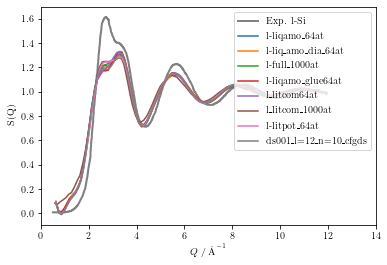

In [279]:
labels = [r'ds001\_l=12\_n=10\_cfgds', r'ds005', r'ds005\_l=12\_n=10']
fig, axs = plt.subplots()
# axs.errorbar(*full_amo[0], yerr=full_amo[1][1],
#             label='a-hpGAP\_litDB\_1000')
# axs.errorbar(*Si_litDB_liqamo_64.Sq_x_av, yerr=Si_litDB_liqamo_64.Sq_x_std[1],
#             label='l-hpGAP\_liqamo\_64')
# axs.errorbar(*Si_litDB_liq_amo_dia_64.Sq_x_av, yerr=Si_litDB_liq_amo_dia_64.Sq_x_std[1],
#             label='l-hpGAP\_liq\_amo\_dia\_64')
# axs.errorbar(*full_liq[0], yerr=full_liq[1][1],
#             label='l-hpGAP\_litDB\_1000')
axs.errorbar(*Si_litDB_liqamo_64.Sq_x_av[0], yerr=None,
            label=r'l-liqamo\_64at')
axs.errorbar(*Si_litDB_liq_amo_dia_64.Sq_x_av[0], yerr=None,
            label=r'l-liq\_amo\_dia\_64at')
axs.errorbar(*Si_litDB_full_4000.Sq_x_av[0], yerr=None,
            label=r'l-full\_1000at')
axs.errorbar(*Si_litDB_glue.Sq_x_av[0], yerr=None,
            label=r'l-liqamo\_glue\-64at')
axs.errorbar(*Si_litDB_litcom.Sq_x_av[0], yerr=None,
            label=r'l\_litcom\-64at')
axs.errorbar(*Si_litDB_litcom_1000.Sq_x_av[1], yerr=None,
            label=r'l\_litcom\_1000at')
axs.errorbar(*Si_litpot_MD.Sq_x_av[1], yerr=None,
            label=r'l-litpot\_64at')
for ct, i in enumerate(Si_litDB_liqamo_MDS[-2:-1]):
    # axs.errorbar(*i.Sq_x_av[0], yerr=i.Sq_x_std[1][1],
    #             label=labels[ct])
    axs.errorbar(*i.Sq_x_av[0], yerr=None,
                label=labels[ct])
axs.plot(*Si_exp_Sq, color='Gray', linewidth=2, label='Exp. l-Si')
#axs.plot(*aSi_exp_Sq, color='k', linewidth=2, label='Exp. a-Si')
axs.legend()
axs.set(xlabel=r'$Q \;/\; \si{\angstrom}^{-1}$', ylabel='S(Q)', xlim=(0, 14))
# fig.savefig(GE+'Analysis/Sq_l-Si_litDB.png', bbox_inches='tight', dpi=100)

[Text(0.5, 0, '$r \\;/\\; \\si{\\angstrom}$'),
 Text(0, 0.5, 'g(r)'),
 (1.5, 6.0)]

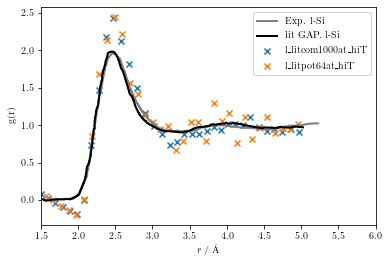

In [281]:
fig, axs = plt.subplots()
# axs.errorbar(*Si_litDB_litcom.gr_av[0], yerr=None,
#             label=r'l-liqamo\_litcom\-64at')
axs.scatter(*Si_litDB_litcom_1000.gr_av[0],
            label=r'l\_litcom\-1000at\_hiT', marker='x')
axs.scatter(*Si_litpot_MD.gr_av[0],
            label=r'l\_litpot\-64at\_hiT', marker='x')
axs.plot(*Si_exp_RDF, color='Gray', linewidth=2, label='Exp. l-Si')
axs.plot(*Si_lGAP_RDF, color='k', linewidth=2, label='lit GAP. l-Si')
#axs.plot(*aSi_exp_Sq, color='k', linewidth=2, label='Exp. a-Si')
axs.legend()
axs.set(xlabel=r'$r \;/\; \si{\angstrom}$', ylabel='g(r)', xlim=(1.5, 6))
# fig.savefig(GE+'Analysis/Sq_l-Si_litDB_RDF.png', bbox_inches='tight', dpi=100)

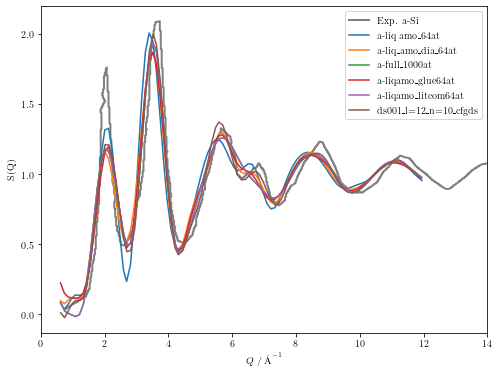

In [171]:
fig, axs = plt.subplots(figsize=(8,6))
# axs.errorbar(*full_amo[0], yerr=full_amo[1][1],
#             label='a-hpGAP\_litDB\_1000')
# axs.errorbar(*Si_litDB_liqamo_64.Sq_x_av, yerr=Si_litDB_liqamo_64.Sq_x_std[1],
#             label='l-hpGAP\_liqamo\_64')
# axs.errorbar(*Si_litDB_liq_amo_dia_64.Sq_x_av, yerr=Si_litDB_liq_amo_dia_64.Sq_x_std[1],
#             label='l-hpGAP\_liq\_amo\_dia\_64')
# axs.errorbar(*full_liq[0], yerr=full_liq[1][1],
#             label='l-hpGAP\_litDB\_1000')
axs.errorbar(*Si_litDB_liqamo_64.Sq_x_av[1], yerr=None,
            label='a-liq\ amo\_64at')
axs.errorbar(*Si_litDB_liq_amo_dia_64.Sq_x_av[1], yerr=None,
            label='a-liq\_amo\_dia\_64at')
axs.errorbar(*Si_litDB_full_4000.Sq_x_av[1], yerr=None,
            label='a-full\_1000at')
axs.errorbar(*Si_litDB_glue.Sq_x_av[1], yerr=None,
            label=r'a-liqamo\_glue\-64at')
axs.errorbar(*Si_litDB_litcom.Sq_x_av[1], yerr=None,
            label=r'a-liqamo\_litcom\-64at')
for ct, i in enumerate(Si_litDB_liqamo_MDS[-2:-1]):
    # axs.errorbar(*i.Sq_x_av[0], yerr=i.Sq_x_std[1][1],
    #             label=labels[ct])
    axs.errorbar(*i.Sq_x_av[1], yerr=None,
                label=labels[ct])
axs.plot(*aSi_exp_Sq, color='Gray', linewidth=2, label='Exp. a-Si')
#axs.plot(*aSi_exp_Sq, color='k', linewidth=2, label='Exp. a-Si')
axs.legend()
axs.set(xlabel=r'$Q \;/\; \si{\angstrom}^{-1}$', ylabel='S(Q)', xlim=(0, 14))
fig.savefig(GE+'Analysis/Sq_a-Si_litDB.png', bbox_inches='tight', dpi=100)


In [75]:
Si_litDB_litcom.bond_angle

array([[  1.,   1.,   1., ..., 179., 179., 179.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

[Text(0.5, 0, 'Angle / deg'), Text(0, 0.5, 'Frequency')]

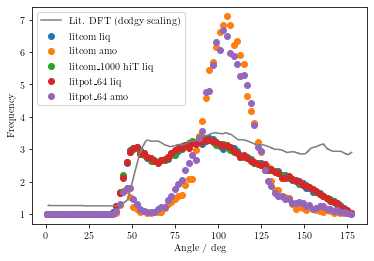

In [285]:
p = Si_litDB_litcom
# BADFs
fig, axs = plt.subplots()
axs.scatter(*p.bond_angle_av[0], label='litcom liq')
axs.scatter(*p.bond_angle_av[1], label='litcom amo')
axs.scatter(*Si_litDB_litcom_1000.bond_angle_av[0], label='litcom\_1000 hiT liq')
axs.scatter(*Si_litpot_MD.bond_angle_av[0], label='litpot\_64 liq')
axs.scatter(*Si_litpot_MD.bond_angle_av[1], label='litpot\_64 amo')
axs.plot(Si_exp_lADF[0], Si_exp_lADF[1]*256+1, label='Lit. DFT (dodgy scaling)', color='Gray')
axs.legend()
axs.set(xlabel='Angle / deg', ylabel='Frequency')
# fig.savefig(GE+'Analysis/Si_ADFs_litDB.png', dpi=100, bbox_inches='tight')


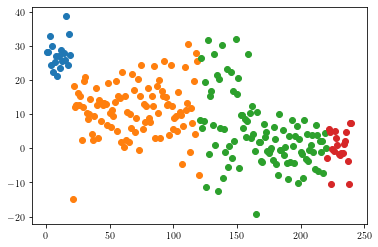

In [38]:
fig, axs = plt.subplots()
a = Si_litDB_full_4000
axs.scatter(a.df.index[:19]/1000, [a.df['c_MSD[4]'][i+1000]-a.df['c_MSD[4]'][i]
                              for i in range(1000,20000,1000)])
axs.scatter(a.df.index[20:120]/1000, [a.df['c_MSD[4]'][i+1000]-a.df['c_MSD[4]'][i]
                              for i in range(20000,120000,1000)])
axs.scatter(a.df.index[120:220]/1000, [a.df['c_MSD[4]'][i+1000]-a.df['c_MSD[4]'][i]
                              for i in range(120000,220000,1000)])
axs.scatter(a.df.index[220:240]/1000, [a.df['c_MSD[4]'][i+1000]-a.df['c_MSD[4]'][i]
                              for i in range(220000,240000,1000)])

In [49]:
np.average([(tm := Si_litDB_liqamo_64.df['c_MSD[4]'])[i+1000] - tm[i] for i in range(20000,120000, 1000)])

9.3915974

In [22]:
def kernel_compare(cfgs, comp,
                   desc=Descriptor('soap average=T l_max=6 n_max=12 \
                                   atom_sigma=0.5 cutoff=5.0 \
                                   cutoff_transition_width=1.0 central_weight=1.0'),
                   zeta=4):
    '''calculates the average/std dev similarity kernel between a set of
    configs and a reference.
    Need to average the kernels for atomic environments?'''
    descs = np.array(desc.calc_descriptor(cfgs))
    descs = descs.reshape(descs.shape[0::2])
    comp_desc = desc.calc_descriptor(comp)[0]
    # norm = np.einsum('ik,ik->i', descs, descs)
    # norm_comp = np.dot(comp_desc, comp_desc)
    k = np.array(np.einsum('ij,j', descs, comp_desc)**zeta)

    return k

In [55]:
with mp.MPRester() as m:
    results = m.query(criteria={"pretty_formula":'Si'},
                            properties=["exp.tags", "icsd_ids", "task_id", "density", "final_structure", "conventional_unit_cell"])
    #results = [m.get_structure_by_material_id(i, conventional_unit_cell=True) for i in ['mp-78', 'mp-1061054']]

In [198]:
for i, val in enumerate(results):
    print(val['exp.tags'], i)
results[16]['final_structure']

['Silicon'] 0
['Silicon hydride (1/0.5)', 'Silicon (O-doped)', 'High pressure experimental phase', 'Silicon', 'Silicon - diamond phase', 'Silicon - cubic diamond form', 'Silicon - type I-clathrate'] 1
['Silicon'] 2
['Silicon'] 3
['Amorphous'] 4
[] 5
[] 6
['Silicon'] 7
['Silicon'] 8
['Silicon - VI', 'High pressure experimental phase'] 9
['High pressure experimental phase', 'Silicon - HP'] 10
[] 11
[] 12
['Silicon'] 13
[] 14
['High pressure experimental phase', 'Silicon - HP'] 15
['High pressure experimental phase', 'Silicon - XII, HP'] 16
['Amorphous'] 17
['Silicon - Bct phase'] 18
[] 19
['Silicon'] 20
['Silicon (46)', 'Silicon'] 21
['Silicon'] 22
['Silicon'] 23
['Silicon - VI', 'High pressure experimental phase'] 24
['Amorphous'] 25
['High pressure experimental phase', 'Silicon - HP', 'Silicon - II, HP'] 26
['Amorphous'] 27
[] 28
['Silicon - HP', 'Silicon - V, HP', 'High pressure experimental phase'] 29
[] 30
['Silicon - II', 'Silicium - HP', 'Silicon - HP'] 31
['Silicon'] 32
['Mangane

In [210]:
Si_pot = Potential(param_filename=GE+'Potentials/Si_litDB_full/Si_test.xml')

In [56]:
bSn = pase.AseAtomsAdaptor.get_atoms(results[18]['final_structure'])
dia = bulk('Si', crystalstructure='diamond', a=5.43,  cubic=True)
fcc = bulk('Si', crystalstructure='fcc', a=3.6, cubic=True)
sh = Atoms(hexagonal.Hexagonal(symbol='Si', latticeconstant={'a':2.65, 'c':4.58}))

In [215]:
sh.set_calculator(Si_pot)
uf = StrainFilter(sh)
opt = BFGS(uf, logfile='/dev/null')
opt.run(0.02)

True

In [57]:
os.chdir(GE)

In [58]:
# bSn_kern = kernel_compare(Si_litDB_liqamo_64.df['Configs'], bSn)
dia_kern = kernel_compare(Si_litDB_liqamo_64.df['Configs'], dia)

In [59]:
sh_kern = kernel_compare(Si_litDB_liqamo_64.df['Configs'], sh)

In [219]:
fcc_kern = kernel_compare(Si_litDB_liqamo_64.df['Configs'], fcc)

[Text(0.5, 0, 'timestep'), Text(0, 0.5, 'similarity to crystal')]

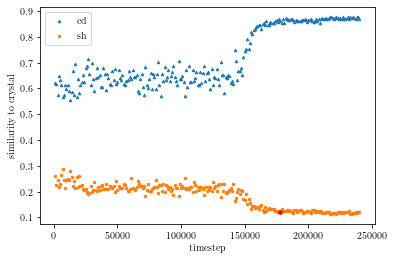

In [60]:
fig, axs = plt.subplots()
# axs.scatter(Si_litDB_liqamo_64.df.index, bSn_kern, s=4, label=r'$\beta$-Sn')
axs.scatter(Si_litDB_liqamo_64.df.index, dia_kern, s=6, label=r'cd', marker='^')
# axs.scatter(Si_litDB_liqamo_64.df.index, fcc_kern, s=4, label=r'fcc')
axs.scatter(Si_litDB_liqamo_64.df.index, sh_kern, s=6, label=r'sh')
axs.scatter(Si_litDB_liqamo_64.df.index[177], sh_kern[177], s=12, marker='o', color='r')
axs.legend()
axs.set(xlabel='timestep', ylabel='similarity to crystal')
#fig.savefig(GE+'Analysis/Si_MDcomp_sh_cd_kernel')

In [119]:
x = [[1,2,3], [4,5,6]]
y = [1,2,3]
np.einsum('ij,j', x, y)


array([14, 32])

In [54]:
desc=Descriptor('soap average=F l_max=6 n_max=12 \
                                      atom_sigma=0.5 cutoff=5.0 \
                                      cutoff_transition_width=1.0 \
                                      n_Z=1 Z={14}')

In [101]:
# litDB_full = GAP(GE+'Potentials/Si_litDB_full/gp_iter6_sparse9k.xml.xyz',
#                  parameter_names=('dft_energy', 'dft_force', 'dft_virial'))
litDB_amoliqdia = GAP(GE+'Potentials/Si_litDB_amoliq/gp_iter6_liq_amo_dia.xyz',
                 parameter_names=('dft_energy', 'dft_force', 'dft_virial'))
litDB_amoliq = GAP(GE+'Potentials/Si_litDB_amoliq/gp_iter6_liqamo.xyz',
                 parameter_names=('dft_energy', 'dft_force', 'dft_virial'))

Training set structure count: 725
Reading xyz file (may take a while)
Read configs, now fixing virials
Config labels: ['dia', 'liq', 'amorph']
Training set structure count: 236
Reading xyz file (may take a while)
Read configs, now fixing virials
Config labels: ['liq', 'amorph']


In [102]:
mDB_amoliq = GAP(GE+'Potentials/Si_MDGAP_val/train.xyz')
#mDB_full = GAP(GE+'Potentials/Si_MDGAP_val/train.xyz')

Training set structure count: 201
Reading xyz file (may take a while)
Read configs, now fixing virials
Config labels: ['amorph', 'inter', 'hiT_amorph', 'liq', 'hiT_liq']


In [103]:
def kernel_mat(cfgs,
                desc=Descriptor('soap average=F l_max=6 n_max=12 \
                                   atom_sigma=0.5 cutoff=5.0 \
                                   cutoff_transition_width=1.0 central_weight=1.0'),
                zeta=4):
    '''calculates the average/std dev similarity kernel among a set of
    configs.
    should do it more efficiently using symmetry einsum
    '''
    descs = np.array(flatten(desc.calc_descriptor(cfgs)))
    descs = descs.reshape(-1, descs.shape[-1]) # flatten out all the environs
    print(descs.shape)
    #descs = descs.reshape(descs.shape[0::2])
    # norm = np.einsum('ik,ik->i', descs, descs)
    # norm_comp = np.dot(comp_d(esc, comp_desc)
    k = np.array(np.einsum('ij,kj', descs, descs)**zeta)

    return k

In [104]:
k = kernel_mat(Si_litDB_liqamo_64.df['Configs'])
np.shape(k)

(15360, 547)


(15360, 15360)

In [27]:
CUR1 = CUR(2)

In [28]:
CUR1.fit_transform(k_ind_mDB, c=4000)

array([[0.77519528, 0.85543334, 0.88428833, ..., 0.62543903, 0.59836246,
        0.58345169],
       [0.70709984, 0.74738328, 0.8382459 , ..., 0.35607158, 0.33922545,
        0.3187513 ],
       [0.88499137, 0.78110212, 0.81303442, ..., 0.49935471, 0.47634772,
        0.45869103],
       ...,
       [0.74203946, 0.9036815 , 0.90003655, ..., 0.74309432, 0.74403349,
        0.69829273],
       [0.66773391, 0.87380174, 0.84522826, ..., 0.82219641, 0.81961835,
        0.78302009],
       [0.86206741, 0.84224756, 0.85013133, ..., 0.75870277, 0.74885406,
        0.71500626]])

In [30]:
CUR1.column_indices_


array([11674, 11353, 11051, ...,  9408, 10667, 12622])

In [105]:
k = kernel_mat(flatten(litDB_amoliq.data_dict['T_configs'] +
           mDB_amoliq.data_dict['T_configs']),
           desc=Descriptor('soap average=T l_max=6 n_max=12 \
                  atom_sigma=0.5 cutoff=5.0 \
                  cutoff_transition_width=1.0 central_weight=1.0'))

(435, 547)


In [ ]:
k_ind_litDB = kernel_mat(flatten(litDB_amoliq.data_dict['T_configs']),
           desc=Descriptor('soap average=F l_max=6 n_max=12 \
                  atom_sigma=0.5 cutoff=5.0 \
                  cutoff_transition_width=1.0 central_weight=1.0'))

In [9]:
k_ind_mDB = kernel_mat(flatten(mDB_amoliq.data_dict['T_configs']),
           desc=Descriptor('soap average=F l_max=6 n_max=12 \
                  atom_sigma=0.5 cutoff=5.0 \
                  cutoff_transition_width=1.0 central_weight=1.0'))


(12800, 547)


In [106]:
pca = decomposition.PCA(n_components=2)
pca.fit(k)
red = pca.fit_transform(k)

red = pca.fit_transform(k)

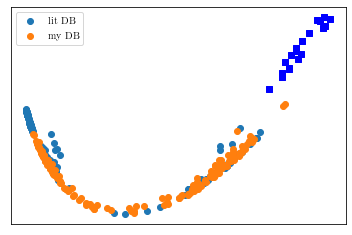

In [255]:
fig, axs = plt.subplots()
axs.scatter(red.T[0][:235], red.T[1][:235], label='lit DB')
axs.scatter(red.T[0][235:], red.T[1][235:], label='my DB')
for i, val in enumerate(red.T[0][:235]):
    if (x := flatten(litDB_amoliq.data_dict['T_configs'])[i].info['dft_virial']) is not None:
        if 0.333*np.trace(x.reshape([3,3])) > 50:
            axs.scatter(red.T[0][i], red.T[1][i], color='b', marker='s')
for i, val in enumerate(red.T[0][235:]):
    if (x := flatten(mDB_amoliq.data_dict['T_configs'])[i].info['dft_virial']) is not None:
        if 0.333*np.trace(x.reshape([3,3])) > 10:
            axs.scatter(red.T[0][235+i], red.T[1][235+i], color='Orange', marker='s')
axs.get_xaxis().set(visible=False)
axs.get_yaxis().set(visible=False)
axs.legend()
# fig.savefig(GE+'Analysis/litDB_mDB_structuremap.png', dpi=100, bbox_inches='tight')

array([[88.37104991,  0.44770357,  4.34995539],
       [ 0.44770357, 79.22306548, -3.41503134],
       [ 4.34995539, -3.41503134, 83.94134991]])

In [ ]:
np.argwhere(red.T[0]<1)


flatten(litDB_amoliq.data_dict['T_configs'])[62].info['dft_virial'].reshape([3,3])

In [11]:
pca = decomposition.PCA(n_components=2)
pca.fit(k_ind_mDB)
red_ind_mDB = pca.fit_transform(k_ind_mDB)

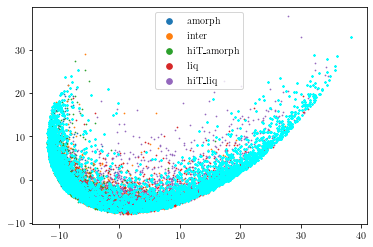

In [33]:
fig, axs = plt.subplots()
for i in range(len(mDB_amoliq.config_labels)):
    axs.scatter(red_ind_mDB.T[0][i*2560:(i+1)*2560], red_ind_mDB.T[1][i*2560:(i+1)*2560],
                label=tex_escape(mDB_amoliq.config_labels[i]), s=0.5)
# axs.scatter(red_ind_mDB.T[0][235:], red.T[1][235:], label='my DB')
for i in range(sum([len(j) for j in flatten(mDB_amoliq.data_dict['T_configs'])])):
    if i in CUR1.column_indices_:
        axs.scatter(red_ind_mDB.T[0][i], red_ind_mDB.T[1][i],
                    s=3, marker='x', color='cyan')
axs.legend(markerscale=8)

In [24]:
for i in mDB_amoliq.data_dict['T_configs']:
    print(sum([len(j) for j in i]))


2560
2560
2560
2560
2560


In [19]:
mDB_amoliq.config_labels


['amorph', 'inter', 'hiT_amorph', 'liq', 'hiT_liq']

In [ ]:
axs.get_
